# Compare classifier performance across cell representations

In [1]:
import polars as pl 
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import MultiComparison

## Seal outcomes

In [ ]:
seal_preds = pl.read_parquet("./compiled_results/compiled_seal_metrics.parquet")
df_pandas = seal_preds.to_pandas()

### AUROC

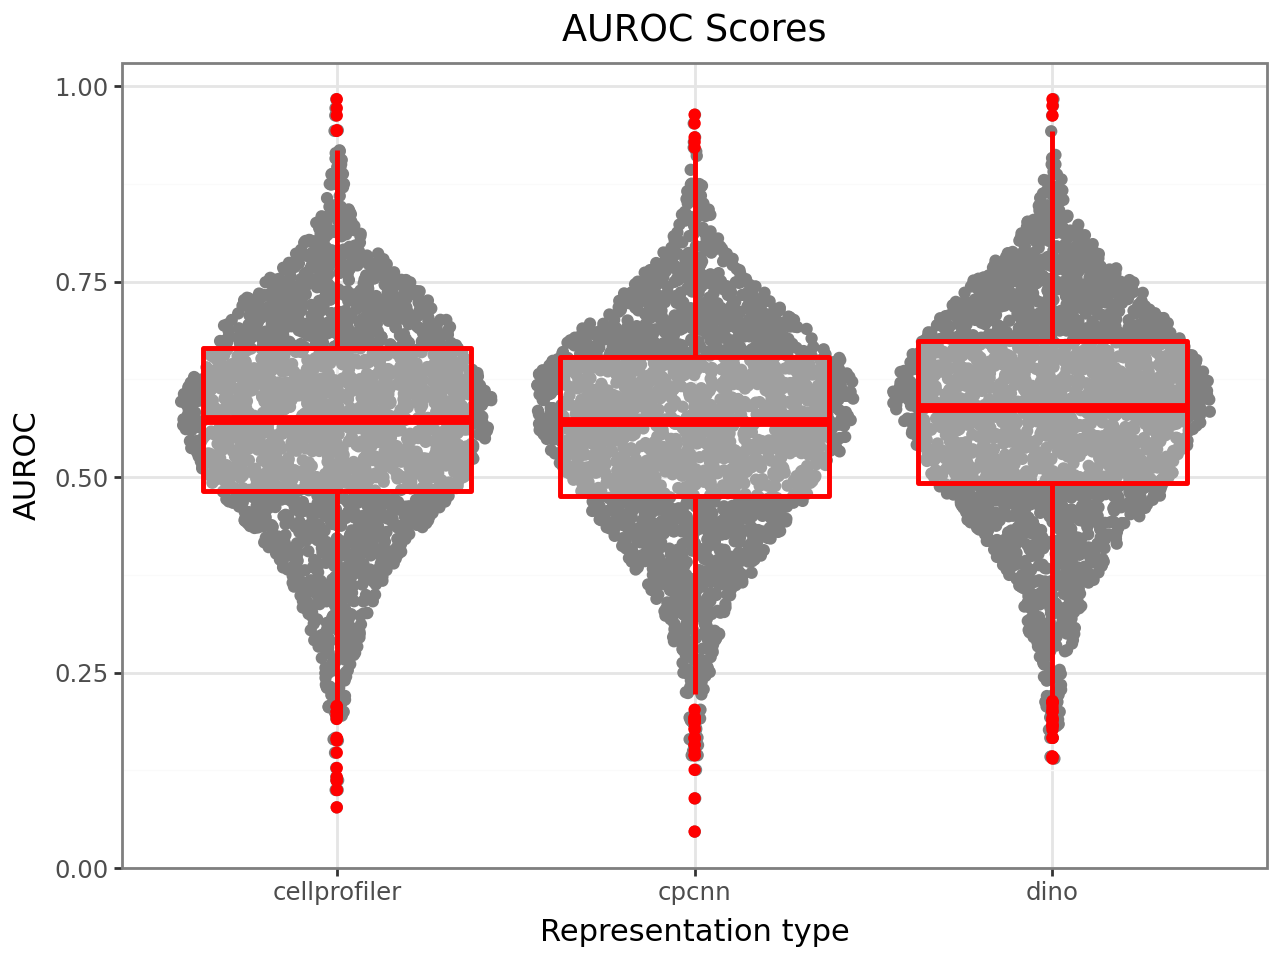

In [2]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(seal_preds, aes(x='Feat_type', y='AUROC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='AUROC Scores', x='Representation type', y='AUROC') 
    + theme_bw()
)
plot.show()

In [4]:
# AUROC
model = smf.mixedlm("AUROC ~ Feat_type", df_pandas, groups=df_pandas["Metadata_Label"],
                    re_formula="~Metadata_AggType")
result = model.fit()
df_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(df_pandas["fitted_values"], df_pandas["Feat_type"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1    group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------------
cellprofiler  cpcnn  -0.0057 0.0332 -0.011 -0.0004   True
cellprofiler   dino   0.0116    0.0 0.0063  0.0168   True
       cpcnn   dino   0.0173    0.0  0.012  0.0225   True
---------------------------------------------------------
[3.32497516e-02 6.57422625e-07 7.79265541e-13]


### macro-averaged F1

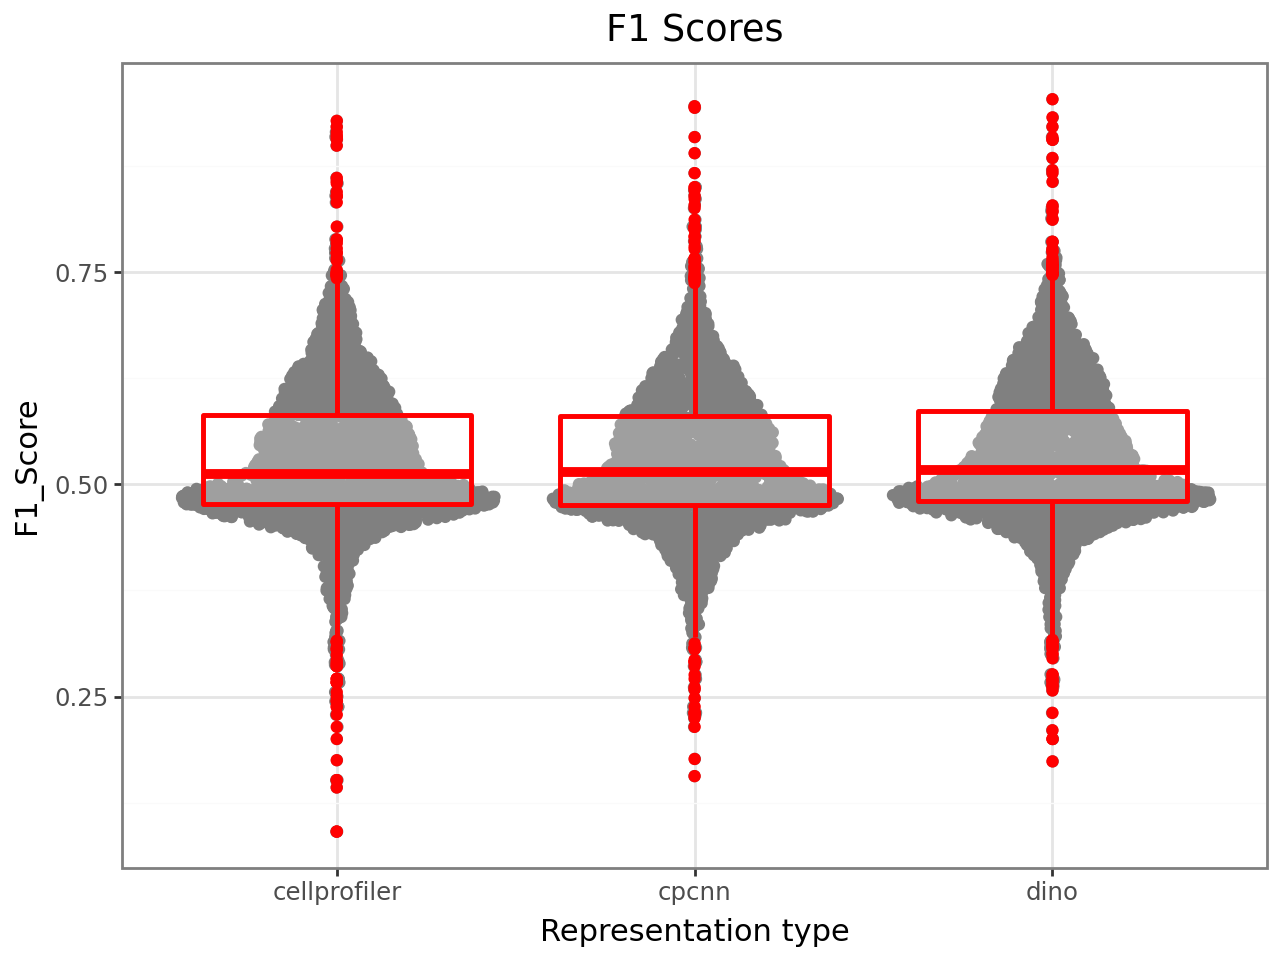

In [5]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(seal_preds, aes(x='Feat_type', y='F1_Score')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='F1 Scores', x='Representation type', y='F1_Score') 
    + theme_bw()
)
plot.show()

In [6]:
# F1 (macro-averaged)
model = smf.mixedlm("F1_Score ~ Feat_type", df_pandas, groups=df_pandas["Metadata_Label"],
                    re_formula="~Metadata_AggType")
result = model.fit()
df_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(df_pandas["fitted_values"], df_pandas["Feat_type"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1    group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------------
cellprofiler  cpcnn  -0.0012 0.6801 -0.0044 0.0021  False
cellprofiler   dino   0.0059    0.0  0.0028 0.0091   True
       cpcnn   dino   0.0071    0.0  0.0039 0.0103   True
---------------------------------------------------------
[6.80105946e-01 3.33852917e-05 6.10752517e-07]


### PRAUC

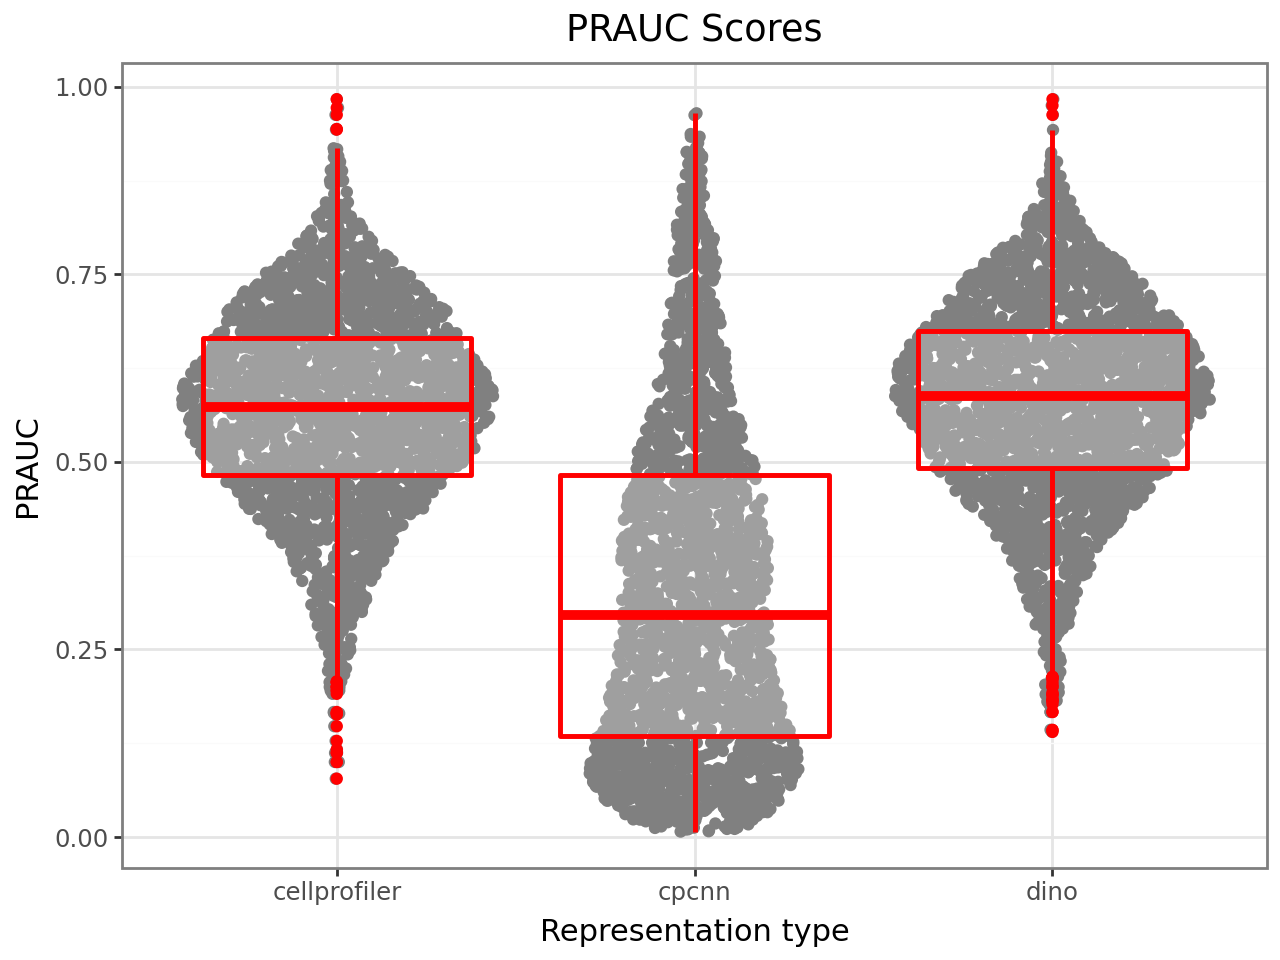

In [7]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(seal_preds, aes(x='Feat_type', y='PRAUC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='PRAUC Scores', x='Representation type', y='PRAUC') 
    + theme_bw()
)
plot.show()

In [8]:
# PR-AUC
model = smf.mixedlm("PRAUC ~ Feat_type", df_pandas, groups=df_pandas["Metadata_Label"],
                    re_formula="~Metadata_AggType")
result = model.fit()
df_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(df_pandas["fitted_values"], df_pandas["Feat_type"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1    group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------------
cellprofiler  cpcnn  -0.2387   0.0 -0.2445 -0.2329   True
cellprofiler   dino   0.0116   0.0  0.0059  0.0173   True
       cpcnn   dino   0.2503   0.0  0.2445   0.256   True
---------------------------------------------------------
[7.18314297e-13 6.00050443e-06 7.18314297e-13]


## Motive outcomes

In [13]:
motive_preds = pl.read_parquet("./compiled_results/compiled_motive_metrics.parquet")
motive_pandas = motive_preds.to_pandas()

### AUROC

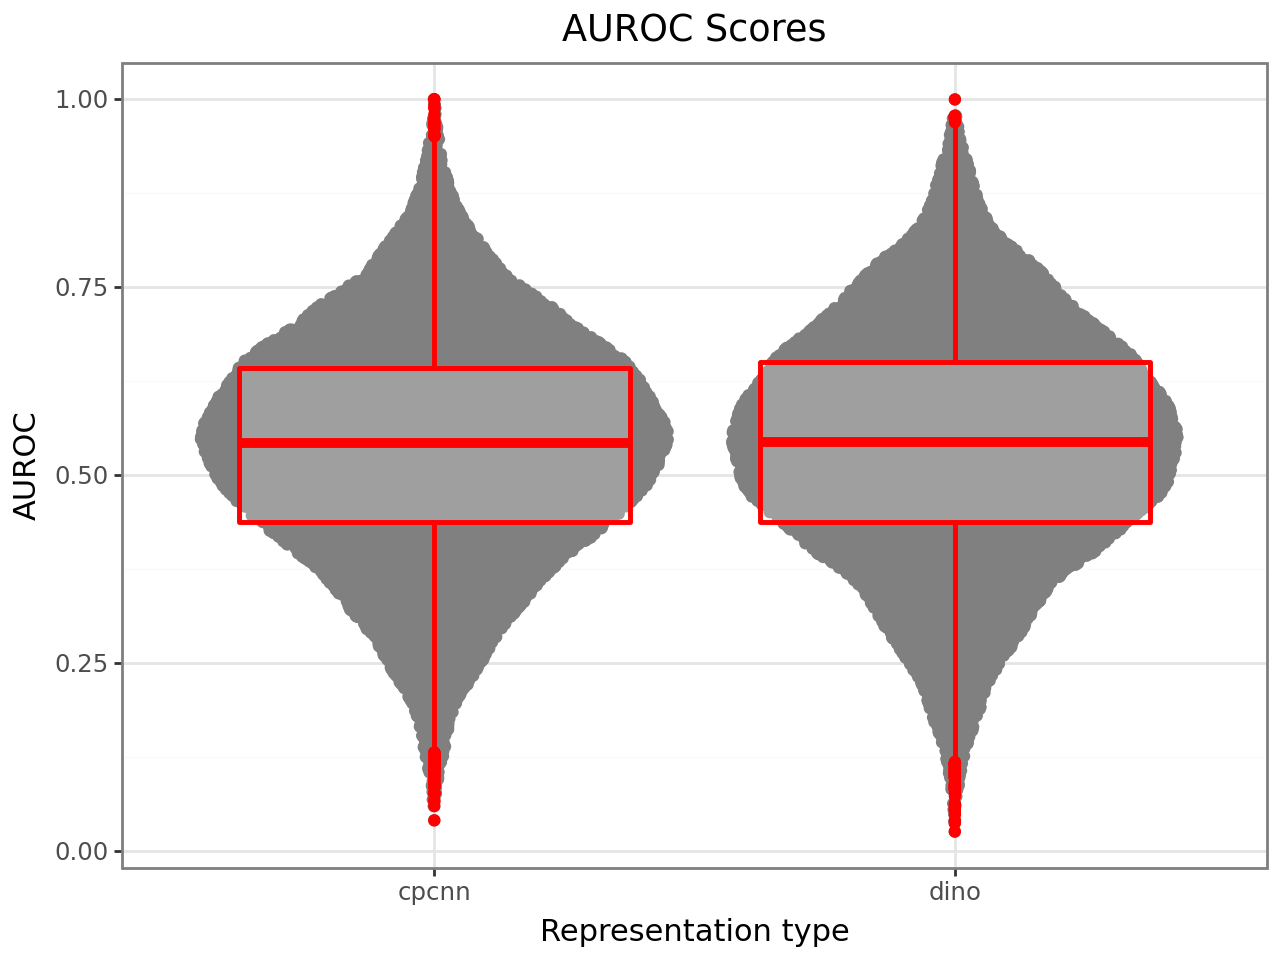

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
 cpcnn   dino    0.003   0.0 0.0016 0.0044   True
-------------------------------------------------
[3.32371422e-05]


In [12]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(motive_preds, aes(x='Feat_type', y='AUROC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='AUROC Scores', x='Representation type', y='AUROC') 
    + theme_bw()
)
plot.show()

# AUROC
model = smf.mixedlm("AUROC ~ Feat_type", motive_pandas, groups=motive_pandas["Metadata_Label"],
                    re_formula="~Metadata_AggType")
result = model.fit()
motive_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(motive_pandas["fitted_values"], motive_pandas["Feat_type"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)

### Macro-averaged F1

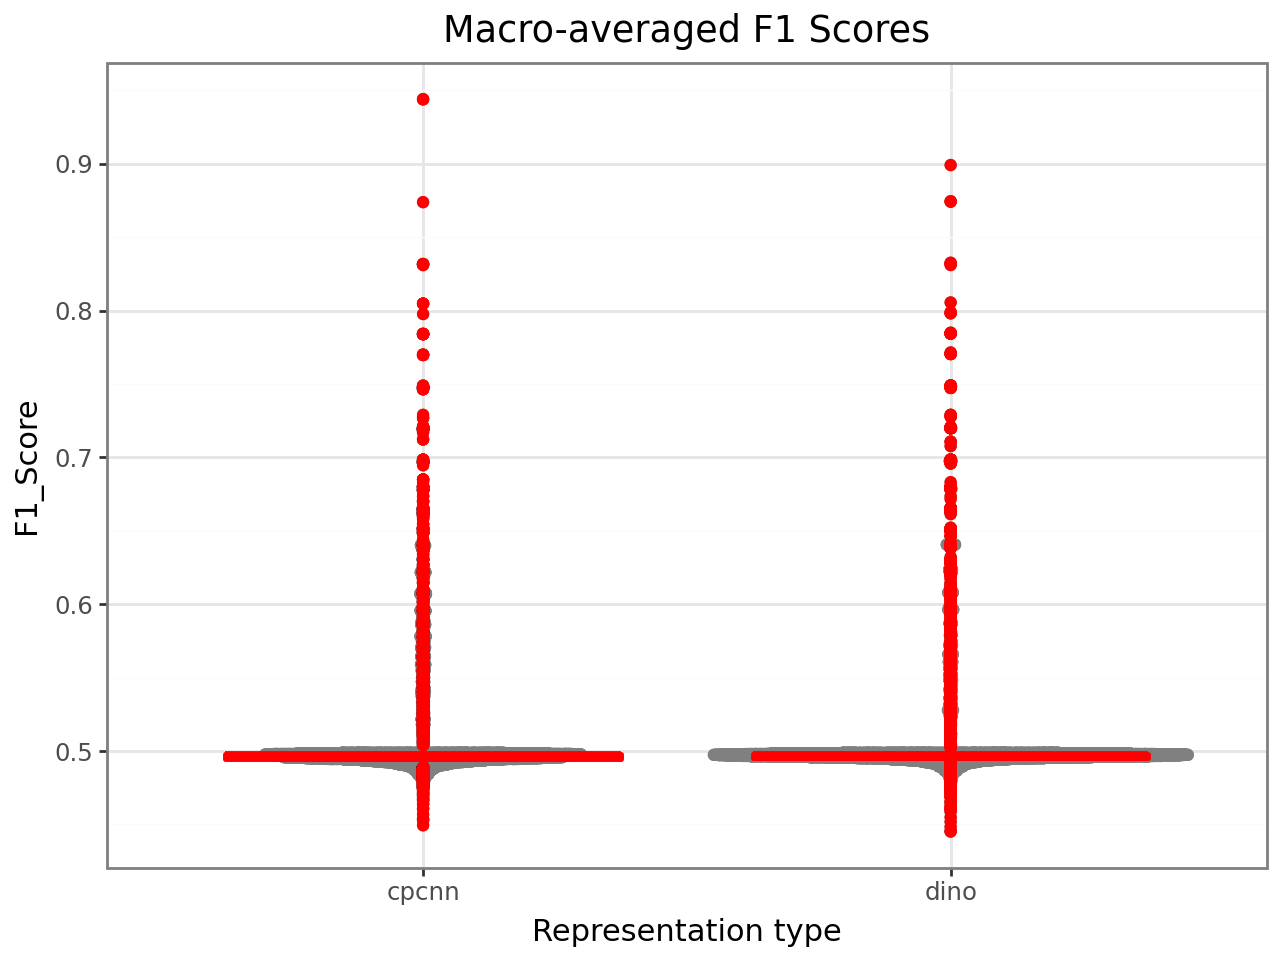

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 cpcnn   dino  -0.0018   0.0 -0.0021 -0.0015   True
---------------------------------------------------
[4.99733588e-12]


In [16]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(motive_preds, aes(x='Feat_type', y='F1_Score')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='Macro-averaged F1 Scores', x='Representation type', y='F1_Score') 
    + theme_bw()
)
plot.show()

# F1 (macro-averaged)
model = smf.mixedlm("F1_Score ~ Feat_type", motive_pandas, groups=motive_pandas["Metadata_Label"],
                    re_formula="~Metadata_AggType")
result = model.fit()
motive_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(motive_pandas["fitted_values"], motive_pandas["Feat_type"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)

### PR-AUC

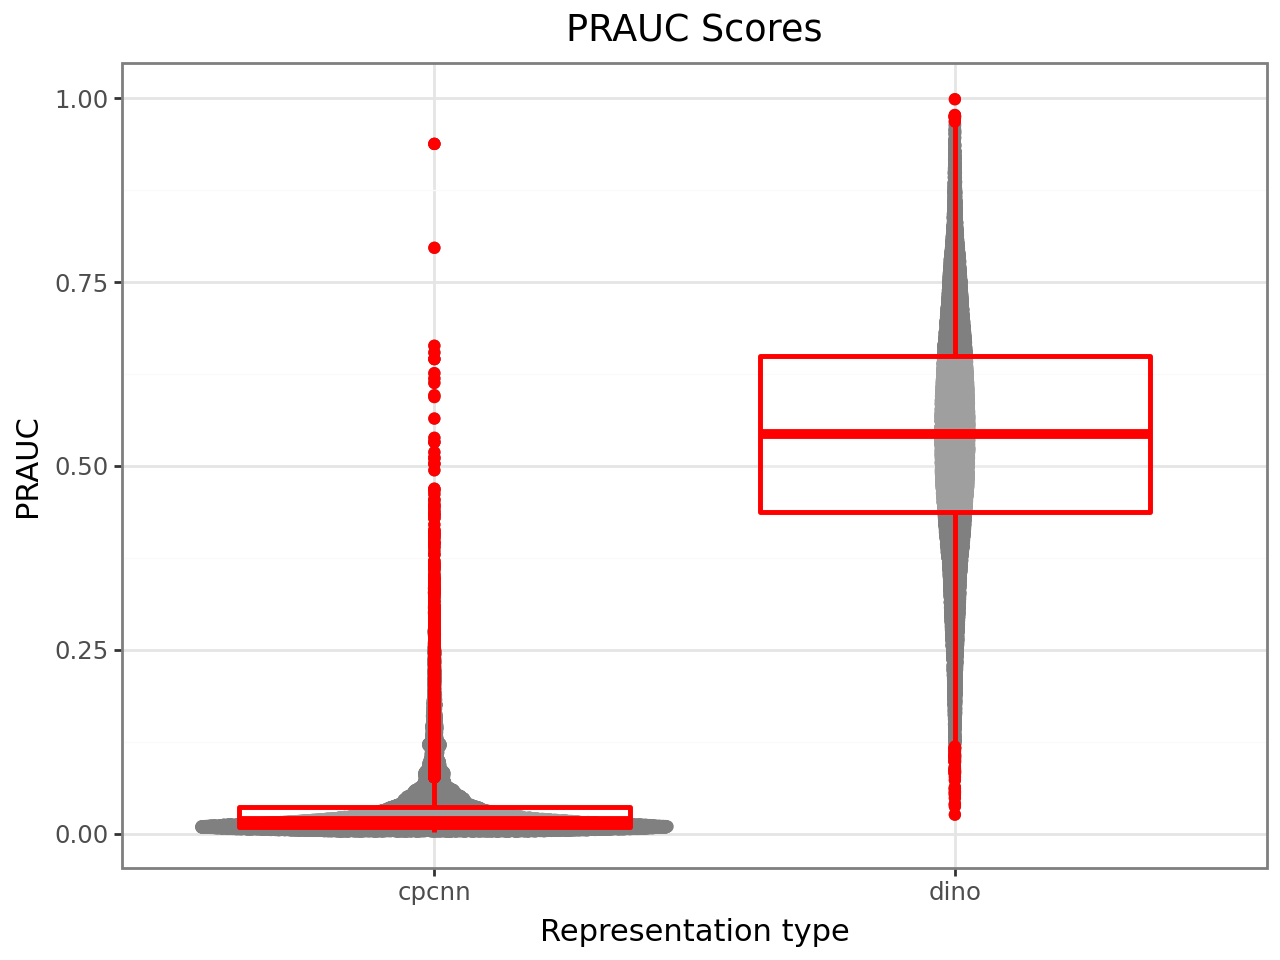

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
 cpcnn   dino   0.5053   0.0 0.5043 0.5062   True
-------------------------------------------------
[4.99733588e-12]


In [17]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(motive_preds, aes(x='Feat_type', y='PRAUC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='PRAUC Scores', x='Representation type', y='PRAUC') 
    + theme_bw()
)
plot.show()

# PR-AUC
model = smf.mixedlm("PRAUC ~ Feat_type", motive_pandas, groups=motive_pandas["Metadata_Label"],
                    re_formula="~Metadata_AggType")
result = model.fit()
motive_pandas["fitted_values"] = result.fittedvalues

mc = MultiComparison(motive_pandas["fitted_values"], motive_pandas["Feat_type"])
tukey_result = mc.tukeyhsd()

tukey_pvals = tukey_result.pvalues
print(tukey_result.summary())
print(tukey_pvals)